## HR Analytics : Job Change of Data Scientists 
URL: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists/data

### Author: Masaya Inoue, Published on Apr 23rd

# Dataset Overview

The dataset pertains to a company in **Big Data** and **Data Science** aiming to hire data scientists from individuals who pass company-conducted courses. They seek to identify candidates genuinely interested in working for them post-training to optimize costs, time, and training quality.

## Content

The dataset encompasses **demographics**, **education**, and **experience** of candidates. It aims to understand the factors influencing individuals to leave their current jobs for HR research. Using models utilizing **credentials**, **demographics**, and **experience** data, the goal is to predict the likelihood of candidates seeking new employment or staying with the company.

## Context

The company desires to understand the factors that lead a person to leave their current job for HR research purposes. By utilizing models that incorporate current **credentials**, **demographics**, and **experience** data, they aim to predict the probability of a candidate seeking new employment or choosing to work for the company post-training.

## Purpose



In [1]:
# !pip install opendatasets 

In [2]:
# pip install --upgrade scikit-learn

In [3]:
import pandas as pd
import os
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, r2_score, confusion_matrix, log_loss, auc, precision_recall_curve, classification_report


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists'

# Using opendatasets let's download the data sets
od.download(dataset)

Skipping, found downloaded files in "./hr-analytics-job-change-of-data-scientists" (use force=True to force download)


In [6]:
data_dir = './hr-analytics-job-change-of-data-scientists'

os.listdir(data_dir)

['aug_test.csv', 'aug_train.csv', 'sample_submission.csv']

In [7]:
train_df = pd.read_csv('hr-analytics-job-change-of-data-scientists/aug_train.csv')
test_df =  pd.read_csv('hr-analytics-job-change-of-data-scientists/aug_test.csv')

In [8]:
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [10]:
test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


### Features

- **enrollee_id**: Unique ID for candidate.
- **city**: City code.
- **city_development_index**: Development index of the city (scaled).
- **gender**: Gender of candidate.
- **relevent_experience**: Relevant experience of candidate.
- **enrolled_university**: Type of University course enrolled if any.
- **education_level**: Education level of candidate.
- **major_discipline**: Education major discipline of candidate.
- **experience**: Candidate total experience in years.
- **company_size**: Number of employees in current employer's company.
- **company_type**: Type of current employer.
- **last_new_job**: Difference in years between previous job and current job.
- **training_hours**: Training hours completed.
- **target**: 0 – Not looking for job change, 1 – Looking for a job change.

## Data Cleaning & Handle Missing Values

In [12]:
# Lets combine train_df and test_df to preprocess data

# Add temporary target feature for test_df
test_df['target'] = -1


pre_df = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True)

In [13]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  21287 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [14]:
print('train_df')
print(train_df.isna().sum()/len(train_df))

print('test_df')
print(test_df.isna().sum()/len(test_df))

train_df
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64
test_df
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.238610
relevent_experience       0.000000
enrolled_university       0.014561
education_level           0.024425
major_discipline          0.146548
experience                0.002349
company_size              0.292156
company_type              0.297792
last_new_job              0.018788
training_hours            0.000000
target                 

In [15]:
for col in pre_df.columns : 
    print(col)
    print(pre_df[col].unique())

enrollee_id
[ 8949 29725 11561 ... 31762  7873 12215]
city
['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'ci

In [16]:
pre_df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [17]:
#Data Cleaning 
pre_df['city'] = pre_df['city'].str.replace('city_', '')

pre_df['enrolled_university'] = pre_df['enrolled_university'].apply(lambda x: 'No Enrollment' if x == 'no_enrollment' else x)

pre_df['experience'] = pre_df['experience'].apply(lambda x: '0' if x == '<1' else x)
pre_df['experience'] = pre_df['experience'].apply(lambda x: '20' if x == '>20' else x)

pre_df['relevent_experience'] = pre_df['relevent_experience'].apply(lambda x: '0' if x == 'No relevent experience' else x)
pre_df['relevent_experience'] = pre_df['relevent_experience'].apply(lambda x: '1' if x == 'Has relevent experience' else x)

pre_df['company_size'] = pre_df['company_size'].apply(lambda x: '0-10' if x == '<10' else x)
pre_df['company_size'] = pre_df['company_size'].apply(lambda x: '10-49' if x == '10/49' else x)

pre_df['company_type'] = pre_df['company_type'].apply(lambda x: 'Private Limited' if x == 'Pvt Ltd' else x)

pre_df['last_new_job'] = pre_df['last_new_job'].apply(lambda x: '0' if x == '<1' else x)
pre_df['last_new_job'] = pre_df['last_new_job'].apply(lambda x: '5' if x == '>4' else x)
pre_df['last_new_job'] = pre_df['last_new_job'].apply(lambda x: '0' if x == 'never' else x)

pre_df['company_size'].fillna('0',inplace=True)
pre_df['company_type'].fillna('Other',inplace=True)
pre_df['major_discipline'].fillna('Other',inplace=True)
pre_df['gender'].fillna('Other',inplace=True)

In [18]:
# Define custom bins and labels
custom_bins = [0, 50, 1000, np.inf]
custom_labels = ['Small', 'Mid', 'Large']

# Extract the lower bound of each range or convert single numbers to numeric
pre_df['company_size_numeric'] = pre_df['company_size'].str.split('-').str[0]

# Convert '10000+' to numeric
pre_df.loc[pre_df['company_size_numeric'] == '10000+', 'company_size_numeric'] = 10000

# Convert to int
pre_df['company_size_numeric'] = pre_df['company_size_numeric'].astype(int)

# Convert 'company_size_numeric' to categories based on custom labels
pre_df['company_size_category'] = pd.cut(pre_df['company_size_numeric'], bins=custom_bins, labels=custom_labels, right=False)


Begin by establishing custom bins and labels to organize the sizes into three distinct categories: Small, Mid, and Large. Following this, the code processes the company size data in the dataframe, converting string representations of ranges (like '50-99') and numerical values (like '10000+') into numerical format. Once the company sizes are numerically represented, the code then categorizes them into the predefined bins using the pd.cut() function, resulting in the creation of a new column labeled 'company_size_category'. This column provides a categorical representation of the company sizes, facilitating further analysis or visualization based on size categories rather than specific numerical values. Overall, this code segment streamlines the process of organizing and categorizing company size data for subsequent analysis or modeling tasks.

In [19]:
print('Before Drop Missing Value')
print(pre_df.isna().sum())
pre_df.dropna(inplace=True)
print('')
print('After Drop Missing Values')
print(pre_df.isna().sum())

Before Drop Missing Value
enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university       417
education_level           512
major_discipline            0
experience                 70
company_size                0
company_type                0
last_new_job              463
training_hours              0
target                      0
company_size_numeric        0
company_size_category       0
dtype: int64

After Drop Missing Values
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
company_size_numeric      0
company_size_category     0
dtype:

In [20]:
# Convert categorical into numerical

pre_df['city'] = pre_df['city'].astype(int)
pre_df['experience'] = pre_df['experience'].astype(int)
pre_df['relevent_experience'] = pre_df['relevent_experience'].astype(int)
pre_df['training_hours'] = pre_df['training_hours'].astype(int)
pre_df['last_new_job'] = pre_df['last_new_job'].astype(int)

## Exploratory Data Analysis

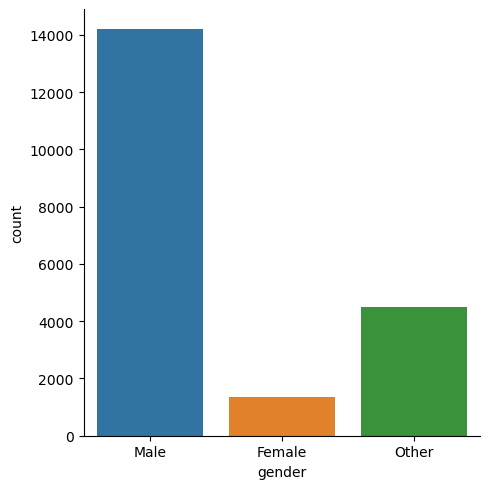

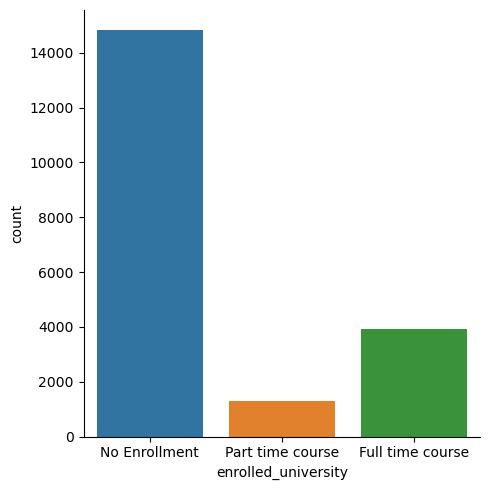

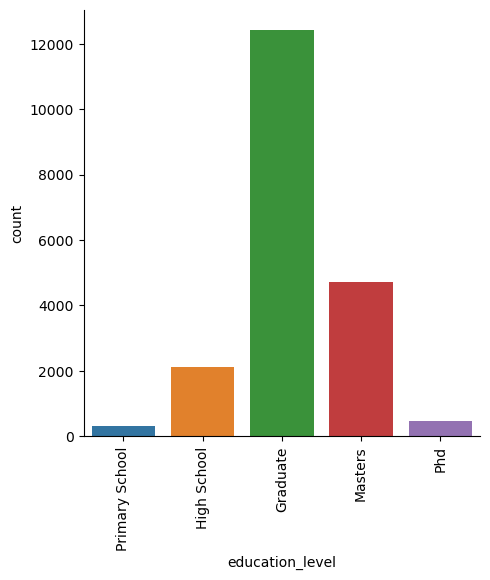

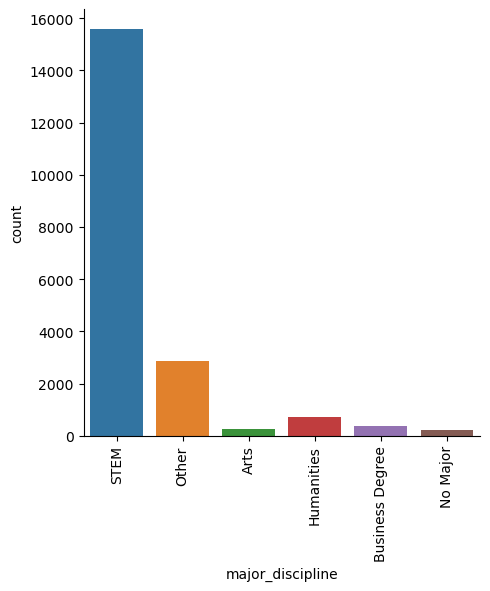

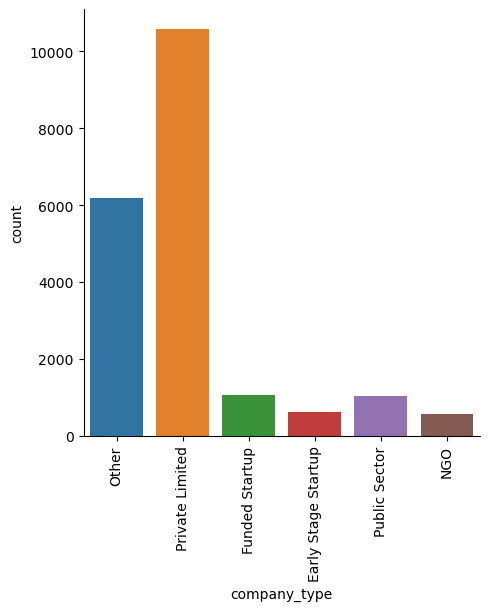

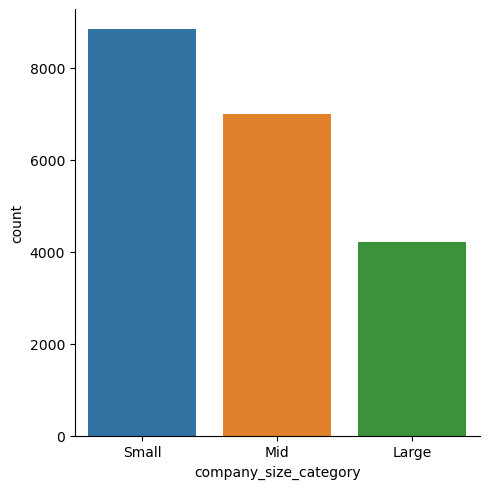

In [21]:
# Select all categorical columns in dataset
categorical_columns = pre_df.select_dtypes(include=['object', 'category']).columns.drop('company_size')



# Define custom orders for each categorical column
custom_orders = {
    'gender': ['Male', 'Female', 'Other'],
    'enrolled_university': ['No Enrollment', 'Part time course', 'Full time course'],
    'education_level': ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'],
    'major_discipline': None,  
    'last_new_job': [ '0', '1', '2', '3', '4', '5'],   
    'company_type': None     
}

for col in categorical_columns:
    # Get custom order for the current column
    custom_order = custom_orders.get(col, None)
    
    # Plot with custom order if available, otherwise use sorted order
    sns.catplot(data=pre_df, x=col, kind='count', order=custom_order)
    
    if col in ['education_level','major_discipline', 'company_type']:
        plt.xticks(rotation=90)  # Rotate x ticks for better readability
    plt.show()



In [22]:
pre_df_viz = pre_df.copy()

In [23]:
# Define mappings
gender_map = {'Female': 2, 'Male': 1, 'Other': 0}
enrolled_university_map = {'No Enrollment': 0, 'Full time course': 1, 'Part time course': 2}
education_level_map = {'Primary School': 0, 'Graduate': 2, 'Masters': 3, 'High School': 1, 'Phd': 4}
major_map = {'STEM': 0, 'Business Degree': 1, 'Arts': 2, 'Humanities': 3, 'No Major': 4, 'Other': 5}
company_type_map = {'Private Limited': 0, 'Funded Startup': 1, 'Early Stage Startup': 2, 'Other': 3, 'Public Sector': 4, 'NGO': 5}
company_size_category_map = {'Small': 0, 'Mid': 1, 'Large': 2}

# Apply mappings to DataFrame
pre_df['gender'] = pre_df['gender'].map(gender_map)
pre_df['enrolled_university'] = pre_df['enrolled_university'].map(enrolled_university_map)
pre_df['education_level'] = pre_df['education_level'].map(education_level_map)
pre_df['major_discipline'] = pre_df['major_discipline'].map(major_map)
pre_df['company_type'] = pre_df['company_type'].map(company_type_map)
pre_df['company_size_category'] = pre_df['company_size_category'].map(company_size_category_map)

pre_df['company_size_category'] = pre_df['company_size_category'].astype(int)

# Check the DataFrame information to ensure mappings were applied correctly
print(pre_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 20032 entries, 0 to 21286
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             20032 non-null  int64  
 1   city                    20032 non-null  int64  
 2   city_development_index  20032 non-null  float64
 3   gender                  20032 non-null  int64  
 4   relevent_experience     20032 non-null  int64  
 5   enrolled_university     20032 non-null  int64  
 6   education_level         20032 non-null  int64  
 7   major_discipline        20032 non-null  int64  
 8   experience              20032 non-null  int64  
 9   company_size            20032 non-null  object 
 10  company_type            20032 non-null  int64  
 11  last_new_job            20032 non-null  int64  
 12  training_hours          20032 non-null  int64  
 13  target                  20032 non-null  float64
 14  company_size_numeric    20032 non-null  int

In [24]:
pre_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_size_numeric,company_size_category
0,8949,103,0.920,1,1,0,2,0,20,0,3,1,36,1.0,0,0
1,29725,40,0.776,1,0,0,2,0,15,50-99,0,5,47,0.0,50,1
2,11561,21,0.624,0,0,1,2,0,5,0,3,0,83,0.0,0,0
4,666,162,0.767,1,1,0,3,0,20,50-99,1,4,8,0.0,50,1
5,21651,176,0.764,0,1,2,2,0,11,0,3,1,24,1.0,0,0


In [25]:
pre_df.drop(columns=['company_size','company_size_numeric'], inplace=True)

In [26]:
train = pre_df[pre_df['target'] != -1].reset_index(drop = True)
test = pre_df[pre_df['target'] == -1].reset_index(drop = True)

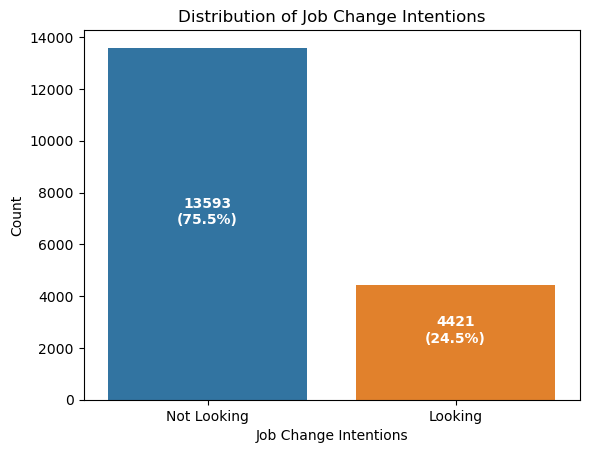

In [29]:

# Calculate percentage of each class
total_count = len(train)
target_counts = train['target'].value_counts()
percentage_not_looking = target_counts[0] / total_count * 100
percentage_looking = target_counts[1] / total_count * 100

# Plot countplot
ax = sns.countplot(x='target', data=train)
plt.title('Distribution of Job Change Intentions')
plt.xlabel('Job Change Intentions')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Looking', 'Looking'])

# Add percentage labels inside bars
for i, count in enumerate(target_counts):
    ax.text(i, count / 2, f"{count}\n({percentage_not_looking:.1f}%)" if i == 0 else f"{count}\n({percentage_looking:.1f}%)",
             ha='center', fontsize=10, fontweight='bold', color='white')

plt.show()

There are much more non job-seekers than job-seekers.

In [27]:
pre_df_viz.drop(columns=['company_size','company_size_numeric'], inplace=True)
train_viz = pre_df_viz[pre_df_viz['target'] != -1].reset_index(drop = True)


train_viz.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size_category
0,8949,103,0.920,Male,1,No Enrollment,Graduate,STEM,20,Other,1,36,1.0,Small
1,29725,40,0.776,Male,0,No Enrollment,Graduate,STEM,15,Private Limited,5,47,0.0,Mid
2,11561,21,0.624,Other,0,Full time course,Graduate,STEM,5,Other,0,83,0.0,Small
3,666,162,0.767,Male,1,No Enrollment,Masters,STEM,20,Funded Startup,4,8,0.0,Mid
4,21651,176,0.764,Other,1,Part time course,Graduate,STEM,11,Other,1,24,1.0,Small


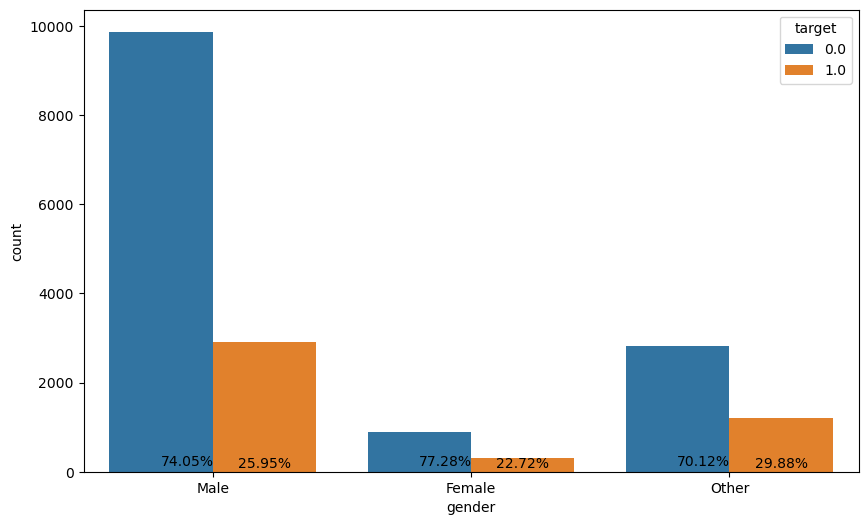

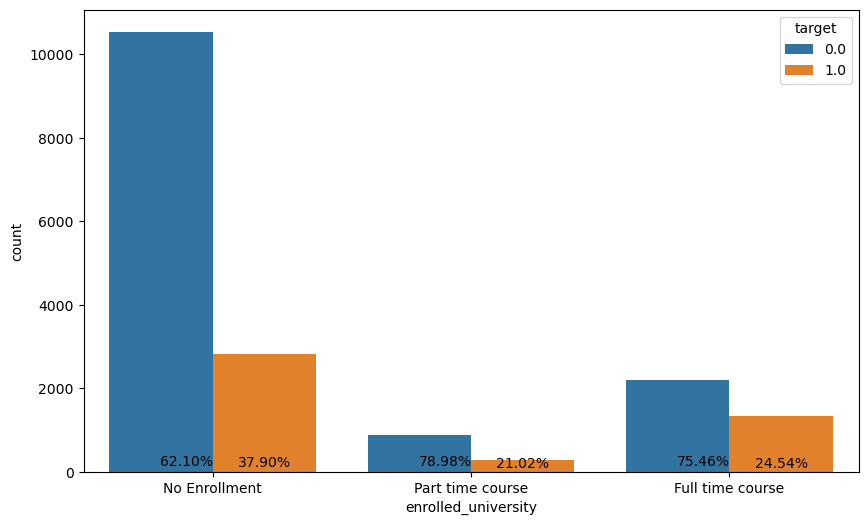

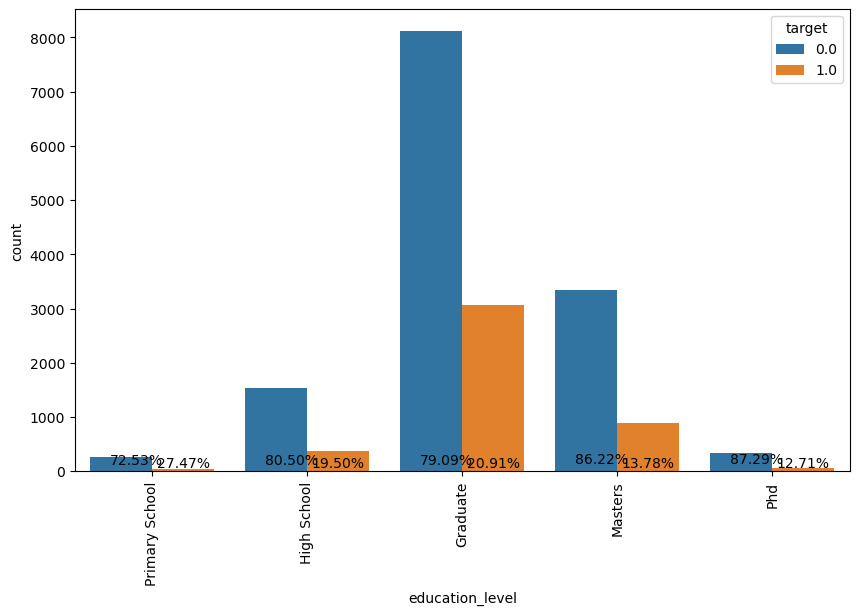

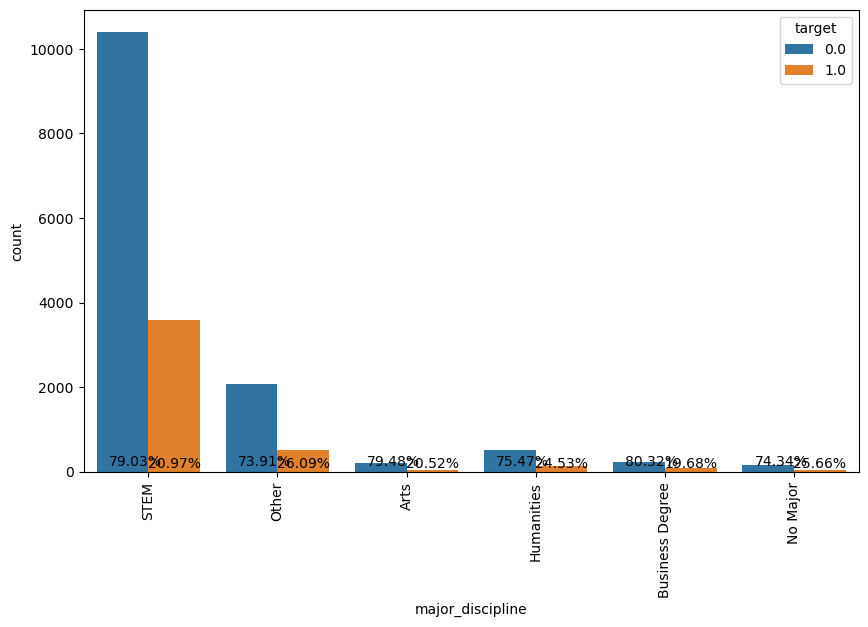

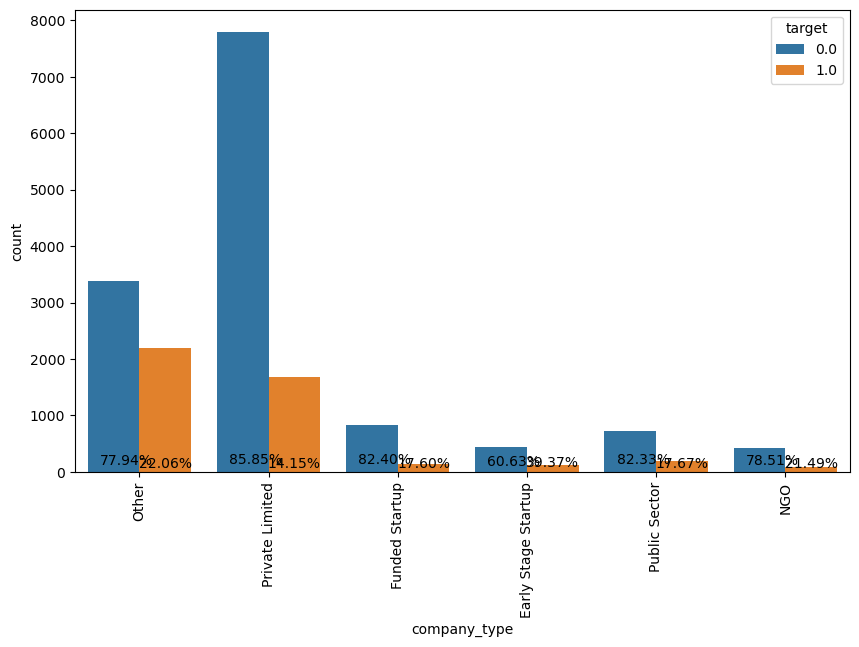

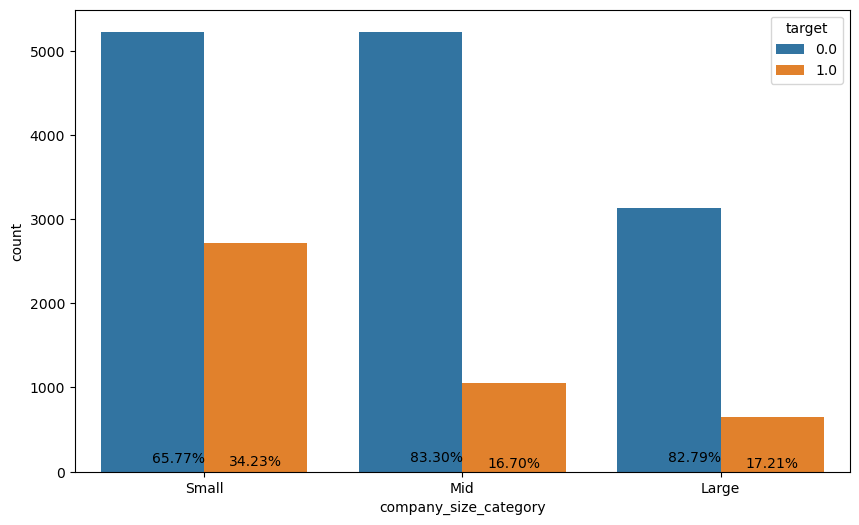

In [28]:
# Select all categorical columns in the dataset
categorical_columns = train_viz.select_dtypes(include=['object', 'category']).columns

# Define custom orders for each categorical column
custom_orders = {
    'gender': ['Male', 'Female', 'Other'],
    'enrolled_university': ['No Enrollment', 'Part time course', 'Full time course'],
    'education_level': ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'],
    'major_discipline': None,  
    'last_new_job': ['0', '1', '2', '3', '4', '5'],   
    'company_type': None     
}

for col in categorical_columns:
    # Get custom order for the current column
    custom_order = custom_orders.get(col, None)
    
    # Plot with custom order if available, otherwise use sorted order
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=train_viz, x=col, order=custom_order, hue='target')
    
    # Calculate the percentage of each target category within each xtick category
    total_counts = train_viz.groupby(col)['target'].count()
    target_counts = train_viz.groupby([col, 'target']).size().unstack()
    target_percentage = (target_counts.T / total_counts).T * 100
    
    if col in ['education_level', 'major_discipline', 'company_type']:
        plt.xticks(rotation=90)  # Rotate x ticks for better readability
    
    # Display the target percentage for each category
    for idx, category in enumerate(target_percentage.index):
        for col_idx, col_name in enumerate(target_percentage.columns):
            percentage = target_percentage.loc[category, col_name]
            bar_position = idx + col_idx * 0.3 - 0.1
            ax.text(bar_position, percentage, f"{percentage:.2f}%", color='black', ha='center', va='bottom')
plt.show()


Interestingly, it shows a noticeable pattern: as the company size increases from Small to Large, the proportion of target 0.0 decreases while the proportion of target 1.0 increases.

In [30]:
# Drop temp 'target' column in test dataset
test.drop(columns='target', inplace=True)
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,company_size_category
0,32403,41,0.827,1,1,1,2,0,9,3,1,21,0
1,9858,103,0.920,2,1,0,2,0,5,0,1,98,0
2,31806,21,0.624,1,0,0,1,5,0,0,0,15,0
3,27385,13,0.827,1,1,0,3,0,11,0,1,39,0
4,27724,103,0.920,1,1,0,2,0,20,0,5,72,2


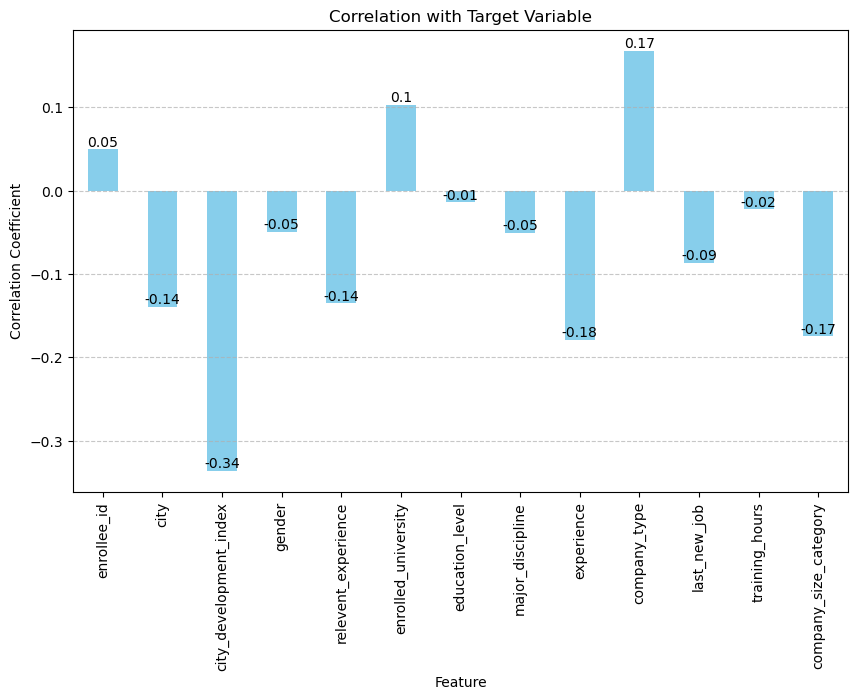

In [31]:

correlation_matrix = train.corr()

# Extract correlation coefficients with the target variable
target_correlation = correlation_matrix['target'].drop('target')  # Drop target variable's correlation with itself

# Plot correlation coefficients with the target variable
plt.figure(figsize=(10, 6))
bar_plot = target_correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add coefficient values inside the bars
for i, val in enumerate(target_correlation):
    plt.text(i, val, round(val, 2), ha='center', va='bottom')

plt.show()

The correlation matrix provides insights into the relationships between different features and the target variable. Here are some insights gained from the correlation matrix:

1. **city_development_index**: There is a moderate **negative correlation** (-0.34) between `city_development_index` and the `target` variable. This suggests that candidates from cities with lower development indices are more likely to be looking for a job change.

2. **experience**: There is a moderate **negative correlation** (-0.18) between `experience` and the `target` variable. This indicates that candidates with more experience are slightly less likely to be seeking a job change.


### Extra : Make predictions 

In [32]:
X = train.drop(['enrollee_id', 'target'], axis = 1)
Y = train['target']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2 ,random_state = 42)

In [33]:
lg_model = LogisticRegression()

lg_model.fit(x_train, y_train)

accuracy = lg_model.score(x_val, y_val)
print("Accuracy:", accuracy)

Accuracy: 0.7552039966694422


In [34]:
y_predict = lg_model.predict(x_val)

In [35]:
conf = confusion_matrix(y_val, y_predict)
print(conf)
print(classification_report(y_val, y_predict))

[[2589  115]
 [ 767  132]]
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85      2704
         1.0       0.53      0.15      0.23       899

    accuracy                           0.76      3603
   macro avg       0.65      0.55      0.54      3603
weighted avg       0.71      0.76      0.70      3603



In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(x_train, y_train)

# Evaluate the model on the validation set
y_train_pred = dt_model.predict(x_train)
y_val_pred = dt_model.predict(x_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Overfitting 

Training Accuracy: 0.9982652140725834
Validation Accuracy: 0.7182903136275326


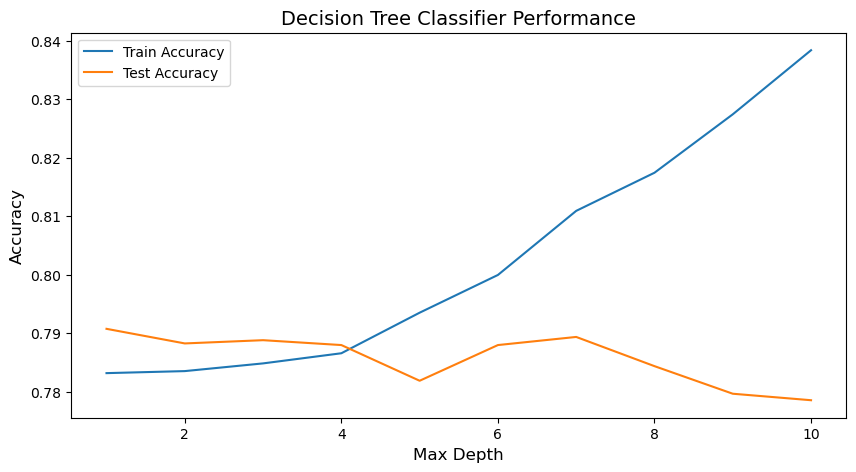

In [37]:
from sklearn.metrics import accuracy_score

# Initialize empty lists to store accuracy scores
accuracy_train_list = []
accuracy_test_list = []

# Iterate over different depths
for depth in range(1, 11):
    # Initialize Decision Tree classifier with specified max_depth
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train the model
    dt_model.fit(x_train, y_train)
    
    # Predict on training and validation sets
    y_train_pred = dt_model.predict(x_train)
    y_val_pred = dt_model.predict(x_val)
    
    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_val, y_val_pred)
    
    # Append accuracy scores to lists
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), accuracy_train_list, label="Train Accuracy")
plt.plot(range(1, 11), accuracy_test_list, label="Test Accuracy")
plt.xlabel("Max Depth", size=12)
plt.ylabel("Accuracy", size=12)
plt.title("Decision Tree Classifier Performance", size=14)
plt.legend()
plt.show()


From above graph, it seems that ideal depth of decision tree will be 4.

In [38]:
# Initialize the model
dt_model = DecisionTreeClassifier(max_depth = 4)

# Train the model
dt_model.fit(x_train, y_train)

# Evaluate the model on the validation set
y_train_pred = dt_model.predict(x_train)
y_val_pred = dt_model.predict(x_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


Training Accuracy: 0.7865519394906668
Validation Accuracy: 0.7879544823757979
